In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
fruits = pd.read_table('fruit_data_with_colors.txt');

In [6]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
fruits.shape

(59, 7)

# Create split

In [9]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
train_test_split?

In [22]:
train_test_split?

D:\INSTALL\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


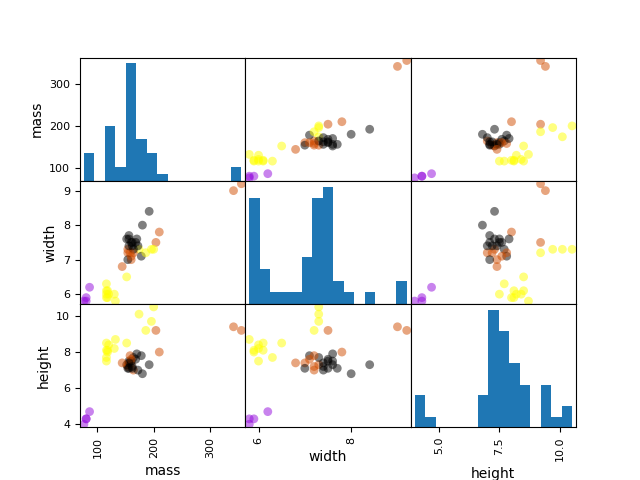

In [25]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins': 15},cmap=cmap)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'],c=y_train, marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [29]:
lookup_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Training the classifier

In [34]:
knn.fit?

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimating the accuracy of the classifier 

In [37]:
knn.score?

In [38]:
knn.score(X_test,y_test)

0.53333333333333333

### Classifying unseen objects

In [40]:
fruit_prediction = knn.predict([[20,2.4,2.5]])

In [41]:
fruit_prediction

array([2], dtype=int64)

In [42]:
fruit_prediction[0]

2

In [44]:
lookup_name[fruit_prediction[0]]

'mandarin'

In [51]:
fruit_prediction = knn.predict([[100,6.5,10]])
lookup_name[fruit_prediction[0]]

'lemon'

In [52]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn?

ModuleNotFoundError: No module named 'adspy_shared_utilities'